In [1]:
# Code to create heatmaps for CMIP6 ensemble + observational data
# Author: Nathan Erickson
# Date: 10/26/2021
# Coded with Python 3.8.10

In [2]:
# Directory management; module importation

import os
import numpy as np
import pandas as pd
import seaborn as sns

# This needs to be revamped a bit for when I create a legit directory for my scripts

os.chdir('..')
home_dir = os.getcwd()
#base_dir = os.path.join(home_dir + 'Thesis')
script_dir = os.path.join(home_dir + '/scripts')
output_dir = os.path.join(home_dir + '/output')
img_dir = os.path.join(home_dir + '/images')

In [3]:
home_dir

'/home/nathane1/Thesis'

In [4]:
# Read in data for significance testing

data = pd.read_csv(os.path.join(output_dir + '/djf_data.csv'), index_col = 'Unnamed: 0')

Text(0.5, 15.0, 'Time')

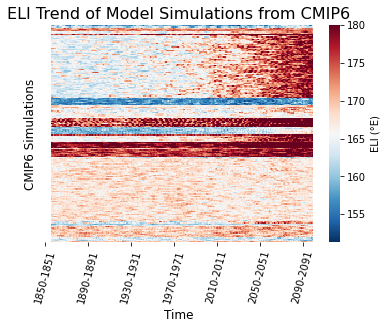

In [5]:
# Plot heatmap of data

djf_heatmap = sns.heatmap(data.T.rolling(7).mean().T, cmap = 'RdBu_r', vmax = 180,
                         xticklabels = 40, yticklabels = '', cbar_kws = {'label':'ELI (°E)'})
djf_heatmap.set(yticklabels=[])
djf_heatmap.set_title('ELI Trend of Model Simulations from CMIP6', size = 16)
djf_heatmap.set_ylabel('CMIP6 Simulations', size = 12)
djf_heatmap.set_xticklabels(djf_heatmap.get_xticklabels(), rotation = 75)
djf_heatmap.set_xlabel('Time', size = 12)

In [6]:
heat_fig = djf_heatmap.get_figure()
os.chdir(img_dir)
#heat_fig.savefig('full_ens_heatmap.jpg', bbox_inches = 'tight')

In [9]:
os.chdir(output_dir)
sim_data = pd.read_csv('monthly_niño_bigtimesteps.csv', index_col = 'Unnamed: 0')
differenced_sims = [sim_data[model] - sim_data[model][0] for model in sim_data]
differenced_sims = pd.DataFrame(differenced_sims).T
#sim_data

In [34]:
nino_sims = sim_data.rolling(7, center = True).mean().T.fillna(-999)
nino_sims.loc[:,'2092-2093':'2099-2100'] = -999
#nino_sims

Text(46.5, 0.5, 'CMIP6 Simulations')

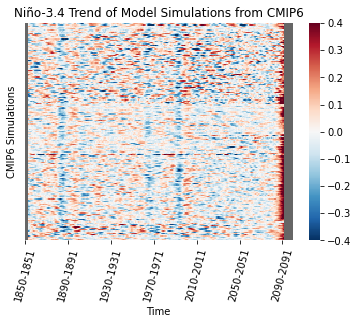

In [33]:
sim_heatmap = sns.heatmap(nino_sims, cmap = 'RdBu_r', vmax = 0.4, vmin = -0.4)
sim_heatmap = sns.heatmap(nino_sims, mask = nino_sims != -999, cmap = 'Dark2_r', cbar = False,
                         xticklabels = 40, yticklabels = '', cbar_kws = {'label':'Niño-3.4 (°C)'})
sim_heatmap.set_title('Niño-3.4 Trend of Model Simulations from CMIP6')
sim_heatmap.set_xlabel('Time')
sim_heatmap.set_xticklabels(sim_heatmap.get_xticklabels(), rotation = 75)
sim_heatmap.set_ylabel('CMIP6 Simulations')

In [35]:
img_dir = '/home/nathane1/Thesis/paper_images'
os.chdir(img_dir)

sim_fig = sim_heatmap.get_figure()
sim_fig.savefig('full_ens_niño_heatmap_alt.jpg', bbox_inches = 'tight')

In [ ]:
sim_data = pd.read_csv('monthly_eli.csv', index_col = 'Unnamed: 0')
differenced_sims = [sim_data[model] - sim_data[model][0] for model in sim_data]
differenced_sims = pd.DataFrame(differenced_sims).T
differenced_sims

In [ ]:
diff_map = sns.heatmap(differenced_sims.T, cmap = 'RdBu_r', cbar_kws = {'label':'ELI Anomaly'})
diff_map.set_title('Differences in ELI from Beginning of Period')
diff_map.set_yticklabels([])
diff_map.set_xlabel('Dates')
diff_map.set_ylabel('Models')

In [ ]:
diff_roll_map = sns.heatmap(differenced_sims.rolling(7).mean().T, cmap = 'RdBu_r', cbar_kws = {'label':'ELI Anomaly'})
diff_roll_map.set_title('Differences in ELI from Beginning of Period (Rolling 7-Year Averages)')
diff_roll_map.set_yticklabels([])
diff_roll_map.set_xlabel('Dates')
diff_roll_map.set_ylabel('Models')

In [ ]:
os.chdir(img_dir)

diff_fig = diff_map.get_figure()
diff_fig.savefig('diff_heatmap.jpg', bbox_inches = 'tight')

diff_roll_fig = diff_roll_map.get_figure()
#diff_roll_fig.savefig('diff_roll_heatmap.jpg', bbox_inches = 'tight')